In [11]:
import numpy as np
import matplotlib.pyplot as plt
import mltools as ml

data = np.genfromtxt("curve80.txt")
X = data[:, 0]
X = np.atleast_2d(X).T
Y = data[:, 1]
Xtr, Xte, Ytr, Yte = ml.splitData(X, Y, 0.75)

In [6]:
X.shape

(80, 1)

In [7]:
Xtr.shape

(60, 1)

In [8]:
Xte.shape

(20, 1)

In [9]:
Ytr.shape

(60,)

In [10]:
Yte.shape

(20,)

Green = Test Data, Red = Training Data


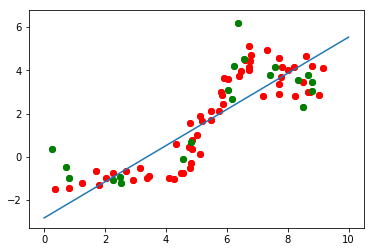

In [20]:
lr = ml.linear.linearRegress(Xtr,Ytr)
xs = np.linspace(0,10,200)
xs = xs[:,np.newaxis]
ys = lr.predict(xs)

print("Green = Test Data, Red = Training Data")
plt.scatter(Xtr,Ytr,color = "red")
plt.scatter(Xte,Yte,color = "green")
plt.plot(xs,ys,)
ax = plt.axis()
plt.show()

In [22]:
print("Linear Regression Coefficients: "+str(lr.theta))
mseTe = lr.mse(Xte,Yte)
mseTr = lr.mse(Xtr,Ytr)

print("Mean Square Error of Test Data: "+str(mseTe))
print("Mean Square Error of Training Data: "+str(mseTr))

Linear Regression Coefficients: [[-2.82765049  0.83606916]]
Mean Square Error of Test Data: 2.24234920301
Mean Square Error of Training Data: 1.12771195561


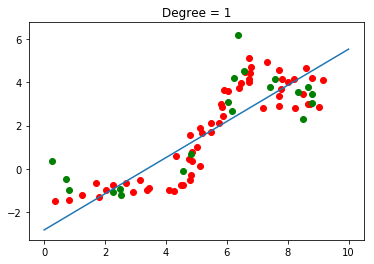

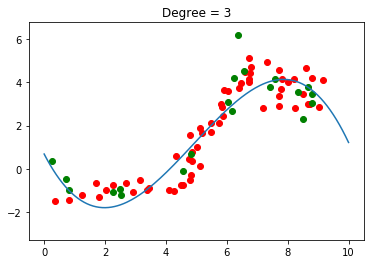

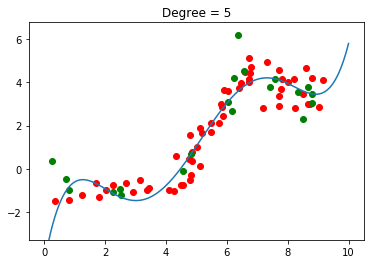

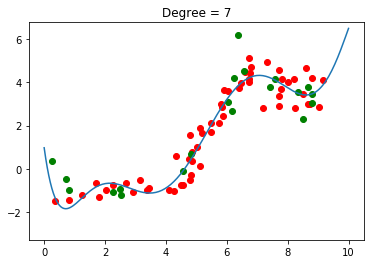

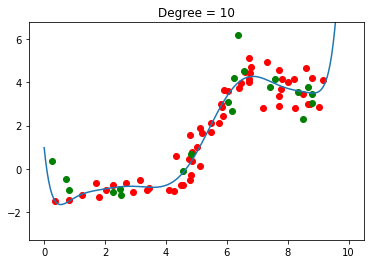

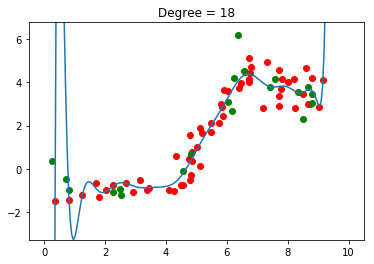

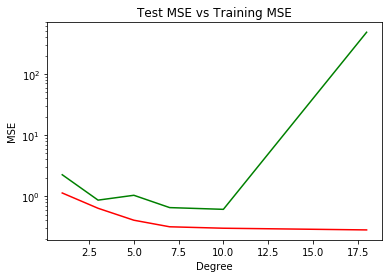

Green = Test Data, Red = Training Data


In [23]:
degrees = [1,3,5,7,10,18]
mseTeList = []
mseTrList = []

for degree in degrees:

    XtrP = ml.transforms.fpoly(Xtr,degree,bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP,Ytr)
    XteP,params = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,
                                                          False),params)
    Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,                                                  False),params)[0]
    YhatTrain = lr.predict(Phi(xs))
    YhatTest = lr.predict(Phi(Xte))
    plt.plot(xs,YhatTrain)
    plt.scatter(Xtr,Ytr,color = "red")
    plt.scatter(Xte,Yte,color = "green")
    plt.axis(ax)
    plt.title("Degree = "+str(degree))
    plt.show()
    mseTe = lr.mse(Phi(Xte),Yte)
    mseTr = lr.mse(Phi(Xtr),Ytr)
    mseTeList.append(mseTe)
    mseTrList.append(mseTr)
    
plt.title("Test MSE vs Training MSE")
plt.ylabel("MSE")
plt.xlabel("Degree")
plt.semilogy(degrees,mseTeList,'g-',degrees,mseTrList,'r-')
plt.show()
print("Green = Test Data, Red = Training Data")

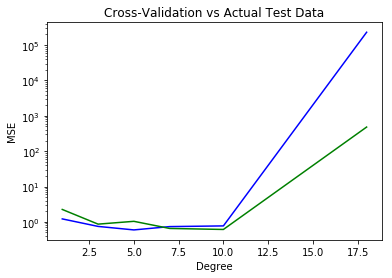

Blue = Cross-Validation, Green = Actual Test Data


In [24]:
nFolds = 5;
J = []

for degree in degrees:

    temp = [0,0,0,0,0]
    for iFold in range(nFolds):
        Xti,Xvi,Yti,Yvi = ml.crossValidate(Xtr,Ytr,nFolds,iFold)
        
        XtiP = ml.transforms.fpoly(Xti,degree,bias=False)
        
        XtiP,params = ml.transforms.rescale(XtiP)
        
        XtiP,params = ml.transforms.rescale(ml.transforms.fpoly(Xti,degree,
                                                    False),params)
        Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,
                                                    False),params)[0]
        learner = ml.linear.linearRegress(XtiP,Yti)
        temp[iFold] = (learner.mse(Phi(Xvi),Yvi))
    J.append(np.mean(temp))
    
plt.title("Cross-Validation vs Actual Test Data")
plt.ylabel("MSE")
plt.xlabel("Degree")
plt.semilogy(degrees,J,'b-',degrees,mseTeList,'g-')
plt.show()
print("Blue = Cross-Validation, Green = Actual Test Data")

In [ ]:
degree 5 has the mininum erro degree. Starting from 10 degree, the cross-validation begin to overfit. 

In [ ]:
degree 5

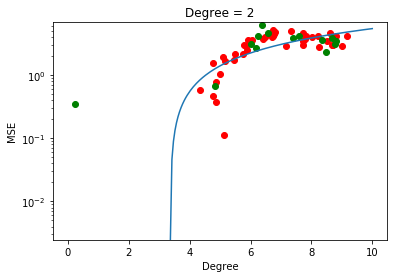

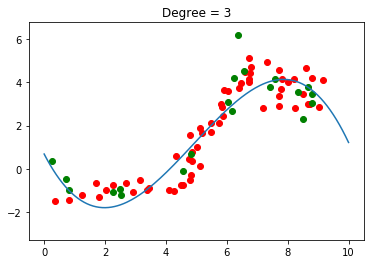

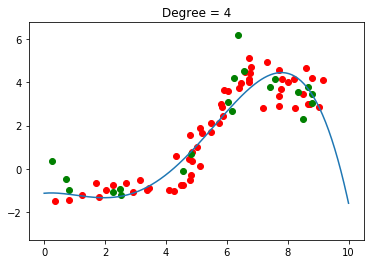

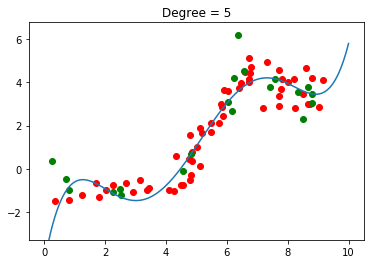

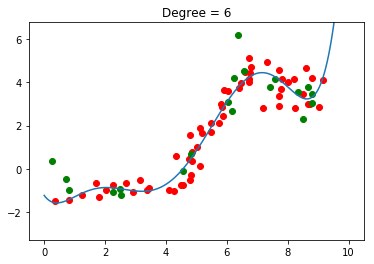

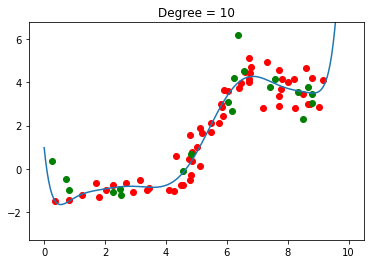

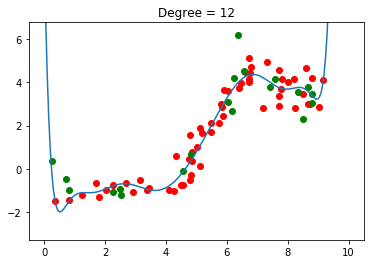

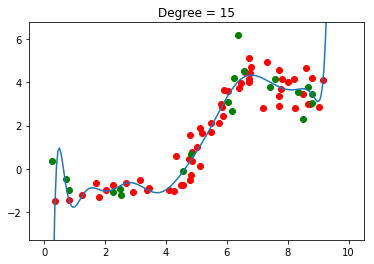

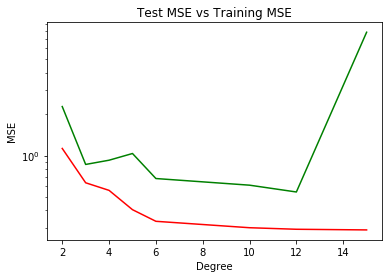

Green = Test Data, Red = Training Data


In [26]:
degrees = [2,3,4,5,6,10,12,15]
mseTeList = []
mseTrList = []

for degree in degrees:

    XtrP = ml.transforms.fpoly(Xtr,degree,bias=False)
    XtrP,params = ml.transforms.rescale(XtrP)
    lr = ml.linear.linearRegress(XtrP,Ytr)
    XteP,params = ml.transforms.rescale(ml.transforms.fpoly(Xte,degree,
                                                          False),params)
    Phi = lambda X: ml.transforms.rescale(ml.transforms.fpoly(X,degree,                                                  False),params)[0]
    YhatTrain = lr.predict(Phi(xs))
    YhatTest = lr.predict(Phi(Xte))
    plt.plot(xs,YhatTrain)
    plt.scatter(Xtr,Ytr,color = "red")
    plt.scatter(Xte,Yte,color = "green")
    plt.axis(ax)
    plt.title("Degree = "+str(degree))
    plt.show()
    mseTe = lr.mse(Phi(Xte),Yte)
    mseTr = lr.mse(Phi(Xtr),Ytr)
    mseTeList.append(mseTe)
    mseTrList.append(mseTr)
    
plt.title("Test MSE vs Training MSE")
plt.ylabel("MSE")
plt.xlabel("Degree")
plt.semilogy(degrees,mseTeList,'g-',degrees,mseTrList,'r-')
plt.show()
print("Green = Test Data, Red = Training Data")

In [ ]:
The graph is similar to the previous graph, degree 6 has the minimum corss-validation error. 
Starting from 12 degree, the cross-validation begin to overfit. At lower degree, corss-validation has lower MSE.
It raises to high level faster than the test data.